In [1]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

plt.rcParams["font.family"] = "arial"

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
# Import experimental data

geags_data = pd.read_csv("GEAGS_data_2.csv")
time = geags_data["Time (min)"].to_numpy()
A1 = geags_data["A1"].to_numpy()
A2 = geags_data["A2"].to_numpy()
A3 = geags_data["A3"].to_numpy()
B1 = geags_data["B1"].to_numpy()
B2 = geags_data["B2"].to_numpy()
B3 = geags_data["B3"].to_numpy()

A12 = A1 - A1[0]
A1_non_leaky = A12[np.argwhere(A12 >= 0)]
t12 = time[len(A1_non_leaky) - 1]
time12 = np.linspace(0,t12,len(A1_non_leaky))

A22 = A2 - A2[0]
A2_non_leaky = A22[np.argwhere(A22 >= 0)]
t22 = time[len(A2_non_leaky) - 1]
time22 = np.linspace(0,t22,len(A2_non_leaky))

A32 = A3 - A3[0]
A3_non_leaky = A32[np.argwhere(A32 >= 0)]
t32 = time[len(A3_non_leaky) - 1]
time32 = np.linspace(0,t32,len(A3_non_leaky))

B12 = B1 - B1[0]
B1_non_leaky = B12[np.argwhere(B12 >= 0)]
tB12 = time[len(B1_non_leaky) - 1]
timeB12 = np.linspace(0,tB12,len(B1_non_leaky))

B22 = B2 - B2[0]
B2_non_leaky = B22[np.argwhere(B22 >= 0)]
tB22 = time[len(B2_non_leaky) - 1]
timeB22 = np.linspace(0,tB22,len(B2_non_leaky))

B32 = B3 - B3[0]
B3_non_leaky = B32[np.argwhere(B32 >= 0)]
tB32 = time[len(B3_non_leaky) - 1]
timeB32 = np.linspace(0,tB32,len(B3_non_leaky))

A_avg = (A1_non_leaky[:88] + A2_non_leaky[:88] + A3_non_leaky[:88])/3
B_avg = (B1_non_leaky[:88] + B2_non_leaky[:88] + B3_non_leaky[:88])/3
avg_fold_change = np.mean((np.max(B1_non_leaky)/np.max(A1_non_leaky),np.max(B2_non_leaky)/np.max(A2_non_leaky),np.max(B3_non_leaky)/np.max(A3_non_leaky)))
avg_fold_change

10.730826930616777

In [3]:
# Import growth data
OD_data = pd.read_csv("GEAGS_growth_data.csv")
#time = OD_data["time(min)"].to_numpy()
OD_blank = 0.078*1
A1 = OD_data["A1"].to_numpy() - OD_blank
A2 = OD_data["A2"].to_numpy() - OD_blank
A3 = OD_data["A3"].to_numpy() - OD_blank
B1 = OD_data["B1"].to_numpy() - OD_blank
B2 = OD_data["B2"].to_numpy() - OD_blank
B3 = OD_data["B3"].to_numpy() - OD_blank

tf_I = 72

C_OD = 1e9
C1 = A1 * C_OD
C2 = A2 * C_OD
C3 = A3 * C_OD
C4 = B1 * C_OD
C5 = B2 * C_OD
C6 = B3 * C_OD

C1_max = np.max(C1)
C2_max = np.max(C2)
C3_max = np.max(C3)
C4_max = np.max(C4)
C5_max = np.max(C5)
C6_max = np.max(C6)
C_max = [C1_max, C2_max, C3_max, C4_max, C5_max, C6_max]

C1_0 = np.min(C1)
C2_0 = np.min(C2)
C3_0 = np.min(C3)
C4_0 = np.min(C4)
C5_0 = np.min(C5)
C6_0 = np.min(C6)
C_0 = [C1_0, C2_0, C3_0, C4_0, C5_0, C6_0]

k_gr = [0.01692117, 0.01527194, 0.01514989, 0.01656997, 0.01770599,
       0.01571999]
k_gr1 = k_gr[0]
k_gr2 = k_gr[1]
k_gr3 = k_gr[2]
k_gr4 = k_gr[3]
k_gr5 = k_gr[4]
k_gr6 = k_gr[5]

C_max_avg = np.mean(C_max[:3])
C_0_avg = np.mean(C_0[:3])
k_gr_avg = np.mean(k_gr[:3])

In [4]:
## Estimate the confidence interval around the experimental data

A_conc = np.concatenate((A1_non_leaky[:88], A2_non_leaky[:88], A3_non_leaky[:88]), axis = 1)
A_mean = np.mean(A_conc, axis = 1)

A_max = np.max(A_conc, axis = 1)
A_min = np.min(A_conc, axis = 1)


std_dev_deg = np.std(A_conc, axis = 1)
conf_int_deg_pos = A_mean + std_dev_deg * 1.96
conf_int_deg_neg = A_mean - std_dev_deg * 1.96

# conf_int_deg_pos = A_mean * 1.2
# conf_int_deg_neg = A_mean * 0.8


B_conc = np.concatenate((B1_non_leaky[:88], B2_non_leaky[:88], B3_non_leaky[:88]), axis = 1)
B_mean = np.mean(B_conc, axis = 1)

B_max = np.max(B_conc, axis = 1)
B_min = np.min(B_conc, axis = 1)

std_dev_no_deg = np.std(B_conc, axis = 1)
conf_int_no_deg_pos =  B_mean + std_dev_no_deg * 1.96
conf_int_no_deg_neg = B_mean - std_dev_no_deg * 1.96

# conf_int_no_deg_pos = B_mean * 1.2
# conf_int_no_deg_neg = B_mean * 0.8

In [5]:
np.shape(A_max)

(88,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


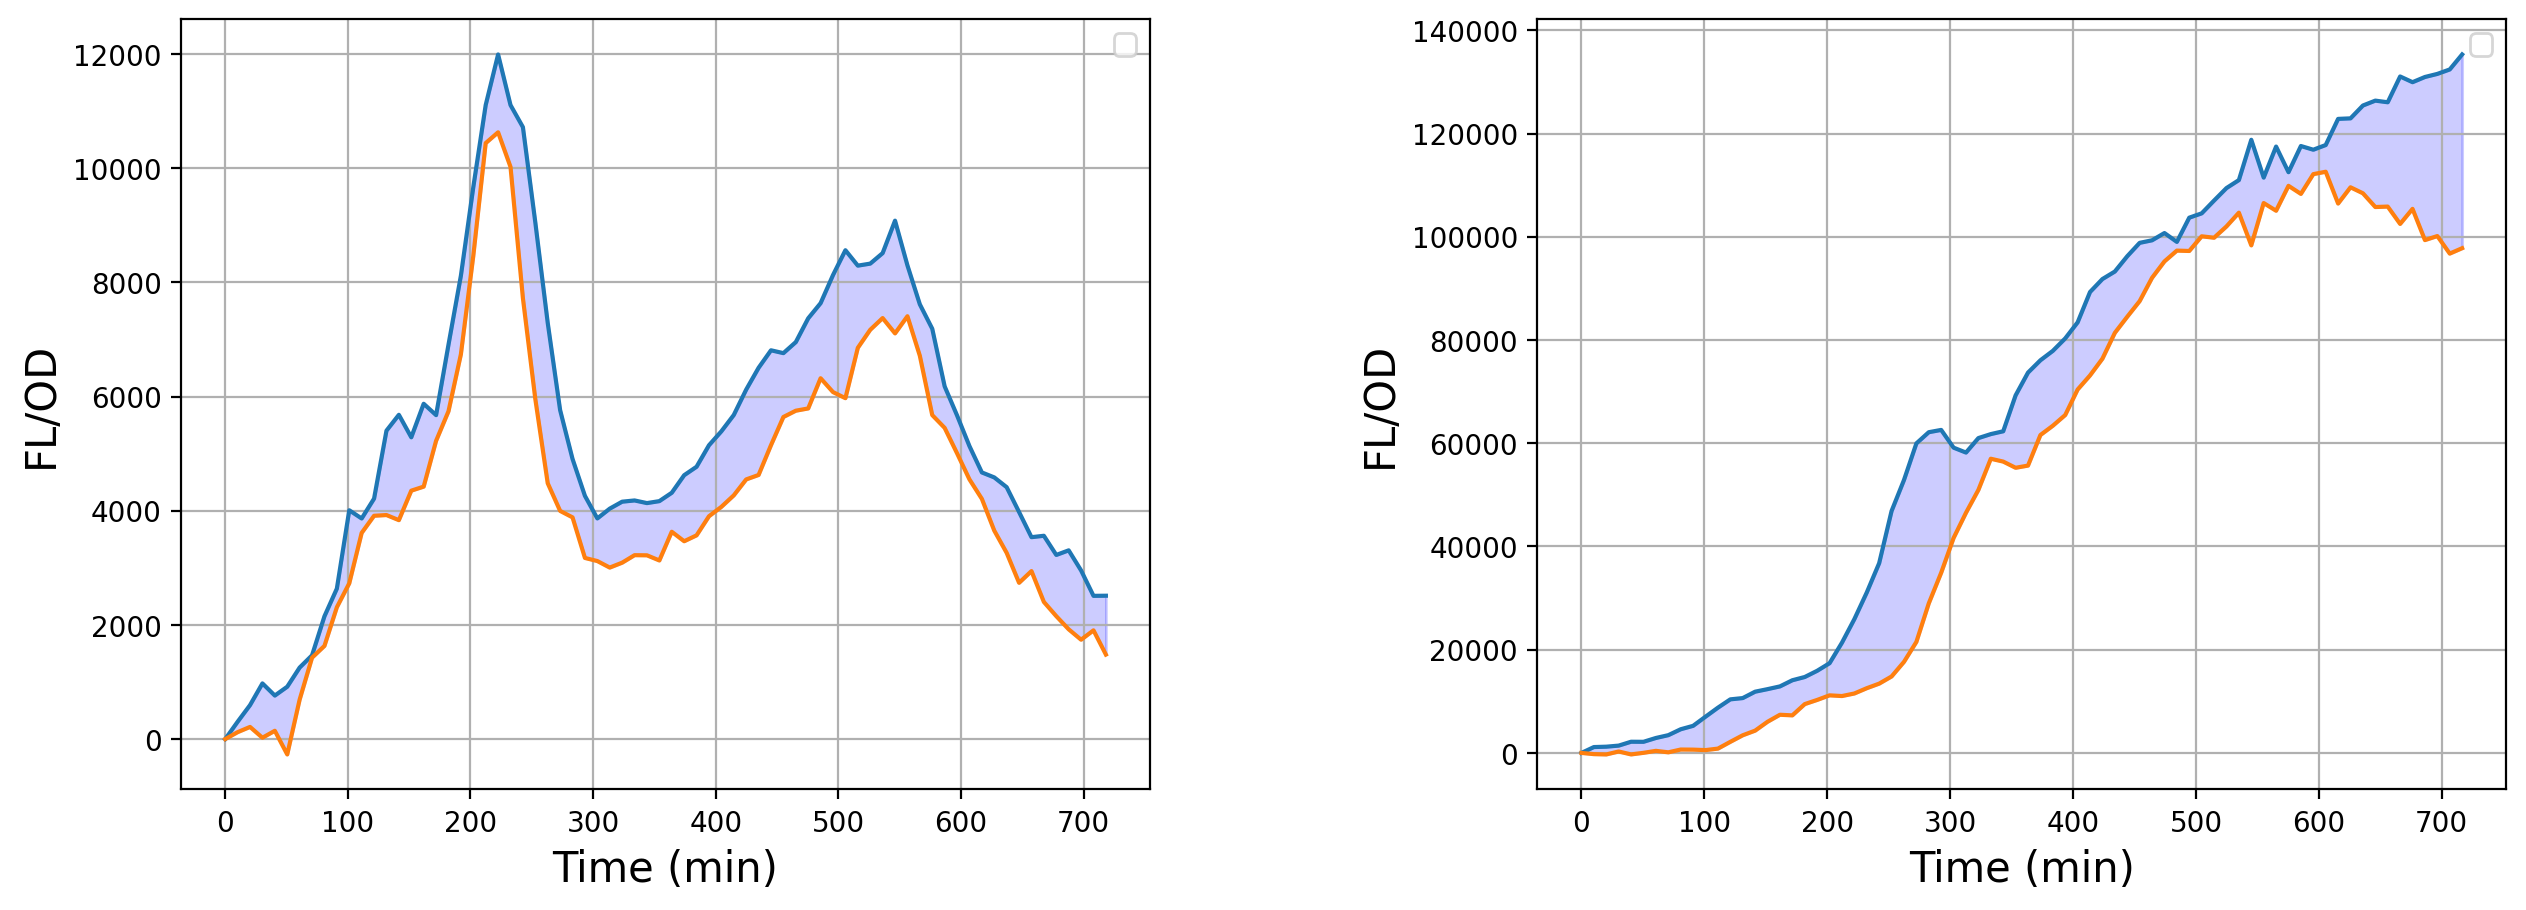

In [6]:
# PLot the confidence interval

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)

r = 0
ax[r].plot(time12[:tf_I], conf_int_deg_pos[:tf_I])
ax[r].plot(time12[:tf_I], conf_int_deg_neg[:tf_I])
ax[r].fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I], conf_int_deg_pos[:tf_I], color='blue', alpha=0.2)
# ax[r].scatter(time12[:tf_I], A1_non_leaky[:tf_I], color = 'royalblue', label = 'Exp. Data')
# ax[r].scatter(time22[:tf_I], A2_non_leaky[:tf_I], color = 'royalblue', label = 'Exp. Data')
# ax[r].scatter(time32[:tf_I], A3_non_leaky[:tf_I], color = 'royalblue', label = 'Exp. Data')
ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r].grid(True)

r = 1
ax[r].plot(timeB12[:tf_I], conf_int_no_deg_pos[:tf_I])
ax[r].plot(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I])
ax[r].fill_between(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I], conf_int_no_deg_pos[:tf_I], color='blue', alpha=0.2)
# ax[r].scatter(timeB12[:tf_I], B1_non_leaky[:tf_I], color = 'lightcoral', label = 'Exp. Data')
# ax[r].scatter(timeB22[:tf_I], B2_non_leaky[:tf_I], color = 'lightcoral', label = 'Exp. Data')
# ax[r].scatter(timeB32[:tf_I], B3_non_leaky[:tf_I], color = 'lightcoral', label = 'Exp. Data')
ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r].grid(True)

In [7]:
## Import the run data 

sol_deg_10 = pd.read_csv('geags_effective_model_10_deg_run_data_061024.csv').to_numpy()
sol_deg_10 = sol_deg_10[:,1:]
sol_no_deg_10 = pd.read_csv('geags_effective_model_10_no_deg_run_data_061024.csv').to_numpy()
sol_no_deg_10 = sol_no_deg_10[:,1:]

sol_deg_15 = pd.read_csv('geags_effective_model_15_deg_run_data_061024.csv').to_numpy()
sol_deg_15 = sol_deg_15[:,1:]
sol_no_deg_15 = pd.read_csv('geags_effective_model_15_no_deg_run_data_061024.csv').to_numpy()
sol_no_deg_15 = sol_no_deg_15[:,1:]

sol_deg_19 = pd.read_csv('geags_effective_model_19_deg_run_data_061024.csv').to_numpy()
sol_deg_19 = sol_deg_19[:,1:]
sol_no_deg_19 = pd.read_csv('geags_effective_model_19_no_deg_run_data_061024.csv').to_numpy()
sol_no_deg_19 = sol_no_deg_19[:,1:]

N_steps = 1000
t_final = 1000
time = np.linspace(0, t_final, N_steps)

tf_i = 720

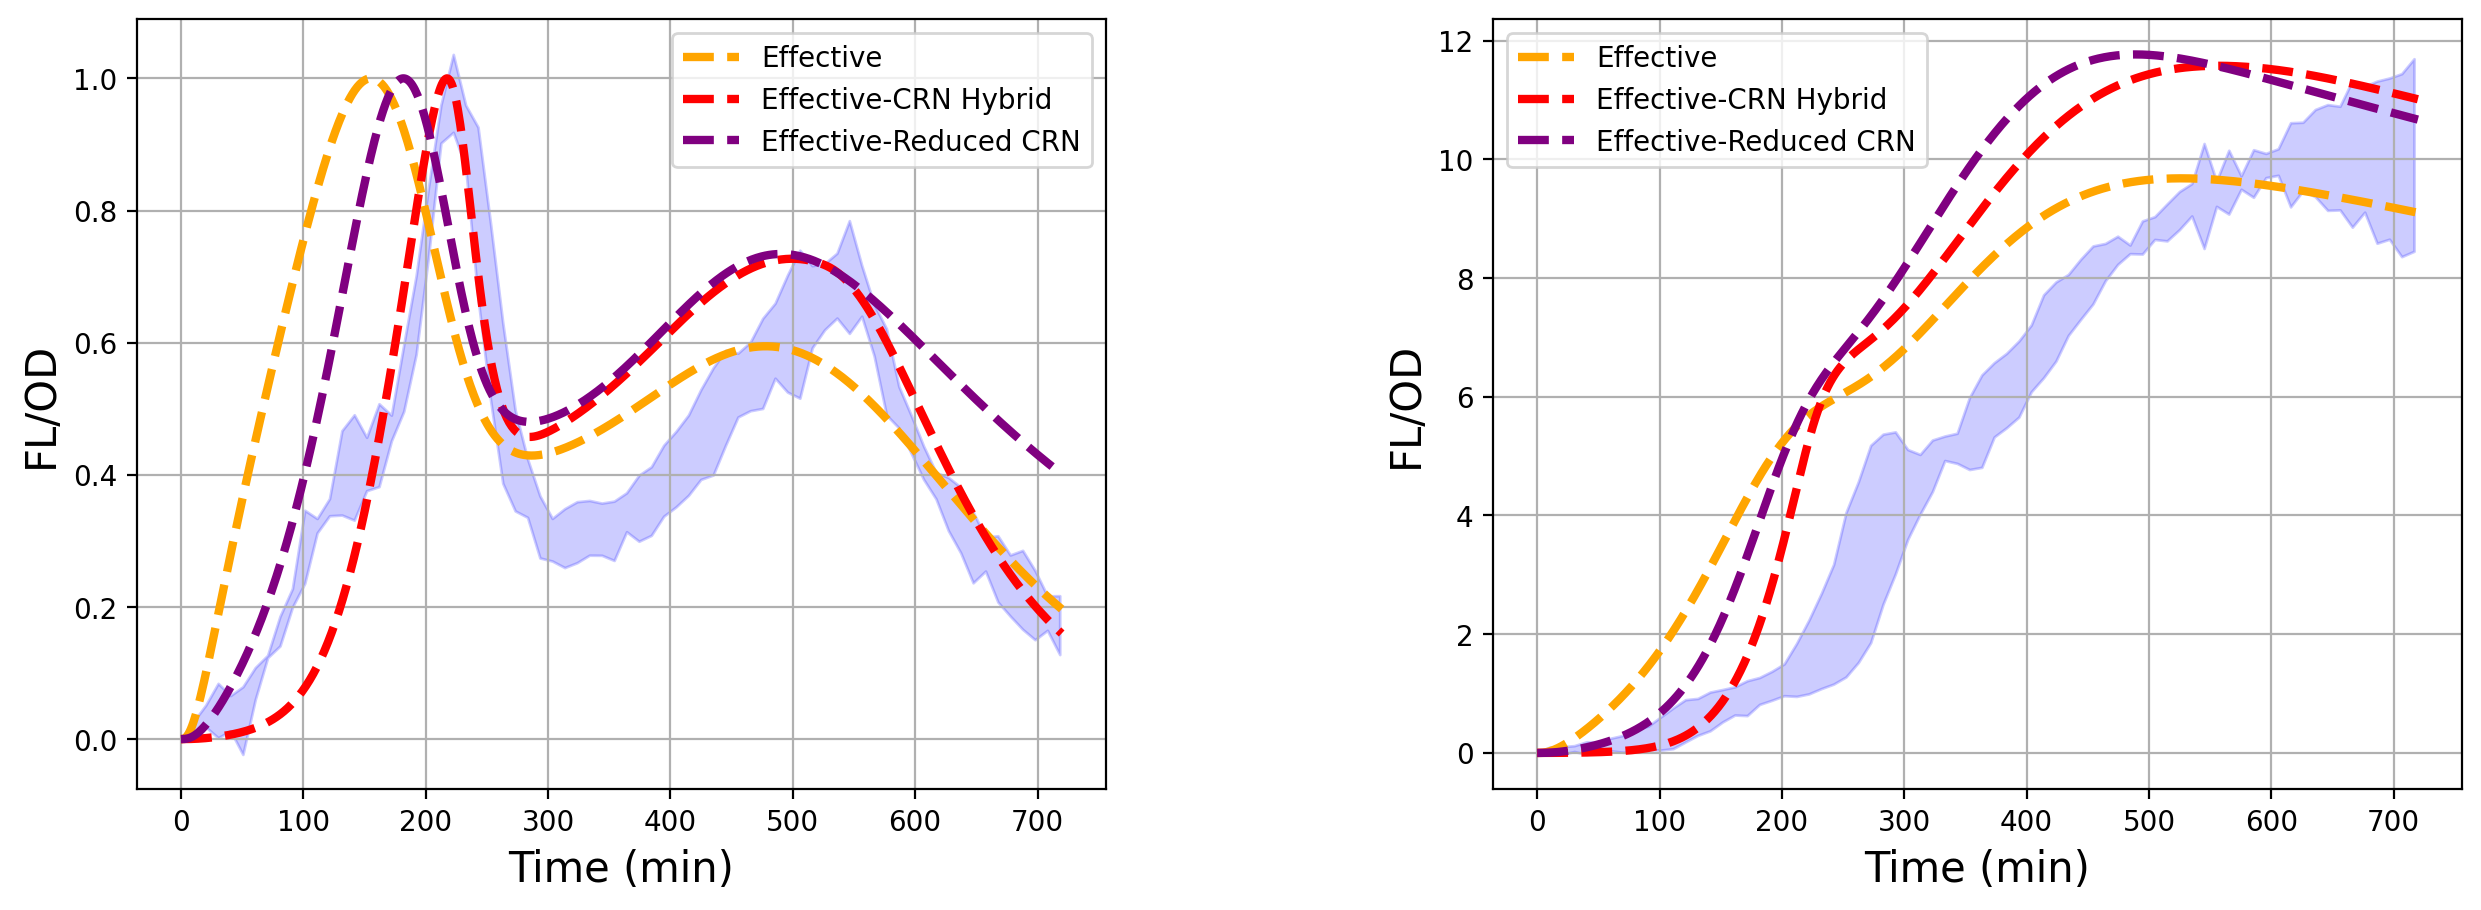

In [8]:
# PLot the comparison

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)
lwidth = 3

r = 0
ax[r].fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_deg_pos[:tf_I]/np.max(A3_non_leaky), color='blue', alpha=0.2)

# ax[r].scatter(time12[:tf_I], A1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue', label = 'Exp. Data')
# ax[r].scatter(time22[:tf_I], A2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')
# ax[r].scatter(time32[:tf_I], A3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')

ax[r].plot(time[:tf_i], sol_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), '--', label = "Effective", color = 'orange', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), '--', label = "Effective-CRN Hybrid", color = 'red', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), '--', label = "Effective-Reduced CRN", color = 'purple', linewidth = lwidth)

ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r].grid(True)

r = 1
ax[r].fill_between(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_no_deg_pos[:tf_I]/np.max(A3_non_leaky), color='blue', alpha=0.2)

# ax[r].scatter(timeB12[:tf_I], B1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral', label = 'Exp. Data')
# ax[r].scatter(timeB22[:tf_I], B2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral')
# ax[r].scatter(timeB32[:tf_I], B3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral')

ax[r].plot(time[:tf_i], sol_no_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), '--', label = "Effective", color = 'orange', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), '--', label = "Effective-CRN Hybrid", color = 'red', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), '--', label = "Effective-Reduced CRN", color = 'purple', linewidth = lwidth)

ax[r].set_xlabel('Time (min)', fontsize = 15) ; ax[r].set_ylabel('FL/OD', fontsize = 15) ; ax[r].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r].grid(True)

### Cells below are used to create publication quality images

In [9]:
from matplotlib.font_manager import FontProperties
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 8,
    'style'  : 'normal'}

import matplotlib 

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial'

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

/var/folders/7j/b_v4dbmd0xs3mkhbd4q2ldcr0000gn/T/ipykernel_42582/2076743647.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = range(-100,800,100), fontsize = 8)
/var/folders/7j/b_v4dbmd0xs3mkhbd4q2ldcr0000gn/T/ipykernel_42582/2076743647.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], fontsize = 8)


[Text(0, -0.2, '-0.1'),
 Text(0, 0.0, '0'),
 Text(0, 0.2, '0.2'),
 Text(0, 0.4000000000000001, '0.4'),
 Text(0, 0.6000000000000001, '0.6'),
 Text(0, 0.8, '0.8'),
 Text(0, 1.0000000000000002, '1'),
 Text(0, 1.2000000000000002, '1.2')]

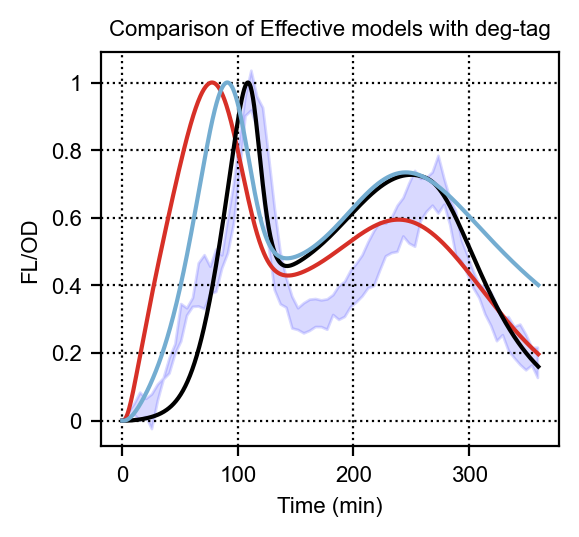

In [10]:
mm = 1/2.54/10  # centimeters in inches
fig, ax = plt.subplots(1,1, figsize = (75 * mm, 65 * mm))
#fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)

lwidth = 1.5


ax.fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_deg_pos[:tf_I]/np.max(A3_non_leaky), color = 'blue', alpha = 0.15)

# ax.scatter(time12[:tf_I], A1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue', label = 'Exp. Data')
# ax.scatter(time22[:tf_I], A2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')
# ax.scatter(time32[:tf_I], A3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')

ax.plot(time[:tf_i], sol_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), '-', label = "Effective", color = '#d73027', linewidth = lwidth)
ax.plot(time[:tf_i], sol_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), '-', label = "Effective-CRN Hybrid", color = 'k', linewidth = lwidth)
ax.plot(time[:tf_i], sol_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), '-', label = "Effective-Reduced CRN", color = '#74add1', linewidth = lwidth)

ax.set_xlabel('Time (min)', fontsize = 8) ; ax.set_ylabel('FL/OD', fontsize = 8) ; #ax.legend()
#ax.set_title('With Deg-tag') ; 
ax.grid(color = 'k', linestyle = ':')
ax.set_title('Comparison of Effective models with deg-tag', fontsize = 8)
ax.set_xticklabels(labels = range(-100,800,100), fontsize = 8)
ax.set_yticklabels(labels = [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2], fontsize = 8)
#fig.savefig('Effective_model_comparison_deg.svg',dpi = 300, box_layout = 'tight')

/var/folders/7j/b_v4dbmd0xs3mkhbd4q2ldcr0000gn/T/ipykernel_42582/1549702254.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = range(-100,800,100), fontsize = 15)
/var/folders/7j/b_v4dbmd0xs3mkhbd4q2ldcr0000gn/T/ipykernel_42582/1549702254.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [-1, 0, 2, 4, 6, 8, 10, 12], fontsize = 15)


[Text(0, -2.0, '-1'),
 Text(0, 0.0, '0'),
 Text(0, 2.0, '2'),
 Text(0, 4.0, '4'),
 Text(0, 6.0, '6'),
 Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12'),
 Text(0, 14.0, '')]

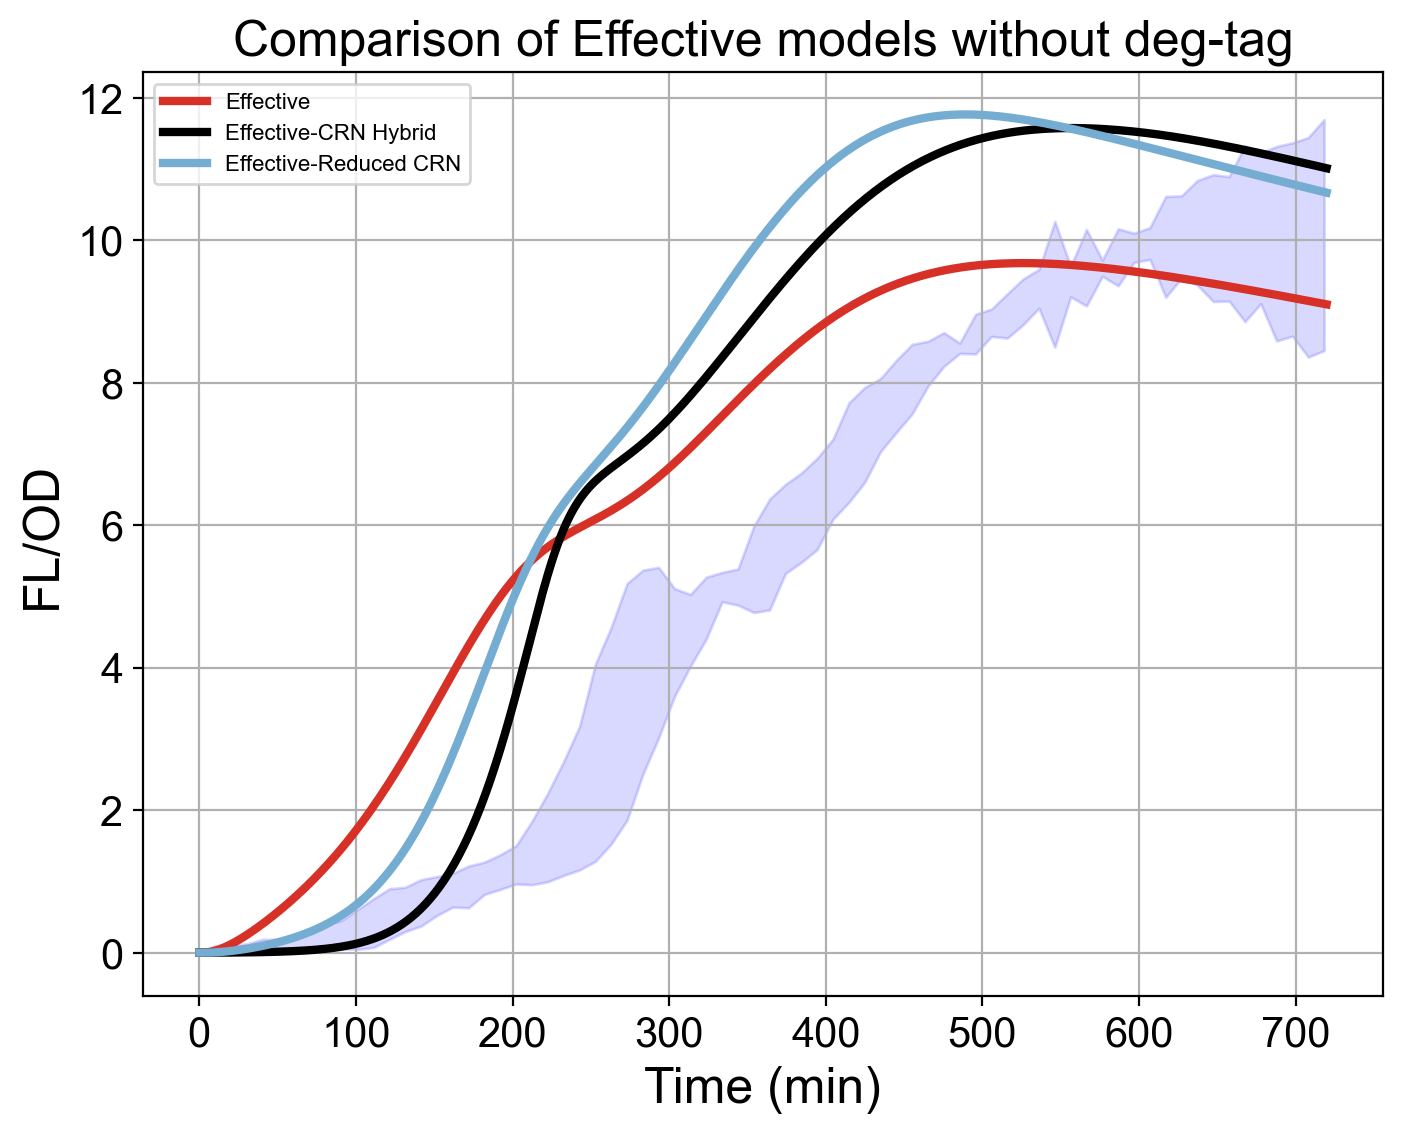

In [11]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
fig.subplots_adjust(wspace = 0.4)#, hspace = 0.1)
lwidth = 3


ax.fill_between(time12[:tf_I], conf_int_no_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_no_deg_pos[:tf_I]/np.max(A3_non_leaky), color = 'blue', alpha = 0.15)

# ax.scatter(time12[:tf_I], A1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue', label = 'Exp. Data')
# ax.scatter(time22[:tf_I], A2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')
# ax.scatter(time32[:tf_I], A3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')

ax.plot(time[:tf_i], sol_no_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), '-', label = "Effective", color = '#d73027', linewidth = lwidth)
ax.plot(time[:tf_i], sol_no_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), '-', label = "Effective-CRN Hybrid", color = 'k', linewidth = lwidth)
ax.plot(time[:tf_i], sol_no_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), '-', label = "Effective-Reduced CRN", color = '#74add1', linewidth = lwidth)

ax.set_xlabel('Time (min)', fontsize = 18) ; ax.set_ylabel('FL/OD', fontsize = 18) ; ax.legend()
#ax.set_title('With Deg-tag') ; 
ax.grid(True)
ax.set_title('Comparison of Effective models without deg-tag', fontsize = 18)
ax.set_xticklabels(labels = range(-100,800,100), fontsize = 15)
ax.set_yticklabels(labels = [-1, 0, 2, 4, 6, 8, 10, 12], fontsize = 15)

In [12]:
sol_data_CRN = pd.read_csv('GEAGS_run_data_061624_4_720min.csv')
sol_deg_CRN = sol_data_CRN['With deg-tag'].to_numpy()
sol_no_deg_CRN = sol_data_CRN['No deg-tag'].to_numpy()
time_CRN = sol_data_CRN['Time'].to_numpy()
sol_data_CRN

,Unnamed: 0,With deg-tag,No deg-tag,Growth,Time
0,0,0.000000,0.000000,0.006667,0.000000
1,1,0.000003,0.000013,0.006771,1.001001
2,2,0.000037,0.000140,0.006878,2.002002
3,3,0.000130,0.000499,0.006986,3.003003
4,4,0.000302,0.001158,0.007095,4.004004
...,...,...,...,...,...
715,715,0.089146,8.474605,0.503200,715.715716
716,716,0.087097,8.471513,0.503207,716.716717
717,717,0.085086,8.468416,0.503215,717.717718
718,718,0.083112,8.465313,0.503222,718.718719


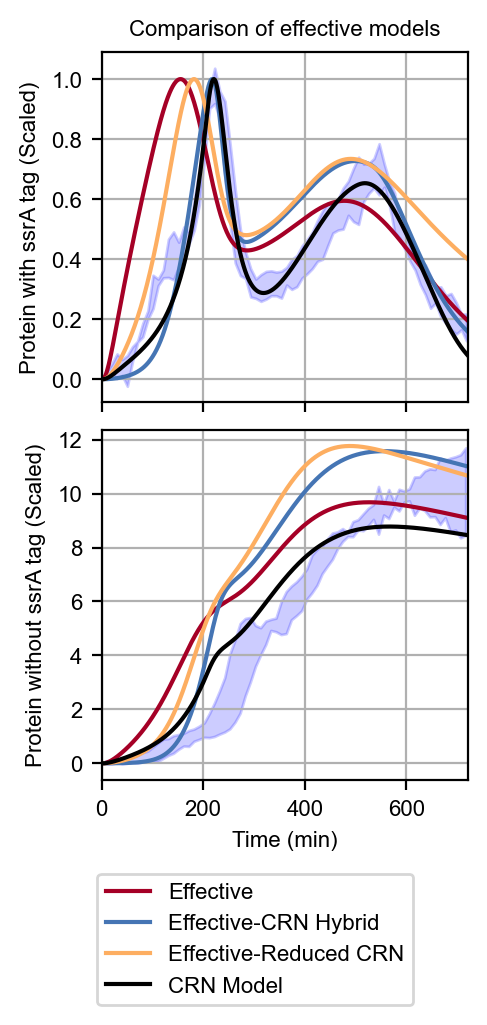

In [23]:
mm = 1/2.54/10  # centimeters in inches
fig, ax = plt.subplots(2,1, figsize = (60 * mm, 120 * mm), sharex = 'col')
fig.subplots_adjust(wspace = 0.4, hspace = 0.08)
lwidth = 1.5
alp = 0.2

r = 0
ax[r].fill_between(time12[:tf_I], conf_int_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_deg_pos[:tf_I]/np.max(A3_non_leaky), color='blue', alpha = alp)

# ax[r].scatter(time12[:tf_I], A1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue', label = 'Exp. Data')
# ax[r].scatter(time22[:tf_I], A2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')
# ax[r].scatter(time32[:tf_I], A3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'royalblue')

ax[r].plot(time[:tf_i], sol_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), label = "Effective", color = '#a50026', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), label = "Effective-CRN Hybrid", color = '#4575b4', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), label = "Effective-Reduced CRN", color = '#fdae61', linewidth = lwidth)
ax[r].plot(time_CRN[:tf_i], sol_deg_CRN[:tf_i]/np.max(sol_deg_CRN), label = "CRN Model", color = 'black', linewidth = lwidth)

ax[r].set_ylabel('Protein with ssrA tag (Scaled)', fontsize = 8) ; #ax[r].legend() ; ax[r].set_xlabel('Time (min)', fontsize = 8) ; 
#ax[r,c].set_title('With Deg-tag') ; 
ax[r].grid(True) ; ax[r].set_xlim([0, time[tf_i]])
ax[r].set_title('Comparison of effective models', fontsize = 8)

r = 1
ax[r].fill_between(timeB12[:tf_I], conf_int_no_deg_neg[:tf_I]/np.max(A3_non_leaky), conf_int_no_deg_pos[:tf_I]/np.max(A3_non_leaky), color='blue', alpha = alp)

# ax[r].scatter(timeB12[:tf_I], B1_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral', label = 'Exp. Data')
# ax[r].scatter(timeB22[:tf_I], B2_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral')
# ax[r].scatter(timeB32[:tf_I], B3_non_leaky[:tf_I]/np.max(A3_non_leaky), color = 'lightcoral')

ax[r].plot(time[:tf_i], sol_no_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2]), label = "Effective", color = '#a50026', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4]), label = "Effective-CRN Hybrid", color = '#4575b4', linewidth = lwidth)
ax[r].plot(time[:tf_i], sol_no_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4]), label = "Effective-Reduced CRN", color = '#fdae61', linewidth = lwidth)
ax[r].plot(time_CRN[:tf_i], sol_no_deg_CRN[:tf_i]/np.max(sol_deg_CRN), label = "CRN Model", color = 'black', linewidth = lwidth)

ax[r].set_xlabel('Time (min)', fontsize = 8) ; ax[r].set_ylabel('Protein without ssrA tag (Scaled)', fontsize = 8) ;# ax[r].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r].grid(True) ; ax[r].set_xlim([0, time[tf_i]])


handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor = (0.45,-0.14))
#fig.savefig('Effective_model_comparison_CRN_python.svg', dpi = 300, bbox_inches='tight')

In [14]:
# effective_deg_protein = sol_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2])
# effective_no_deg_protein = sol_no_deg_10[:tf_i,2]/np.max(sol_deg_10[:,2])

# effective_CRN_deg_protein = sol_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4])
# effective_CRN_no_deg_protein = sol_no_deg_15[:tf_i,4]/np.max(sol_deg_15[:,4])

# effective_red_deg_protein = sol_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4])
# effective_red_no_deg_protein = sol_no_deg_19[:tf_i,4]/np.max(sol_deg_19[:,4])

# time_eff = time[:tf_i]

# eff_data = dict()

# eff_data['effective_deg_protein'] = effective_deg_protein
# eff_data['effective_no_deg_protein'] = effective_no_deg_protein

# eff_data['effective_CRN_deg_protein'] = effective_CRN_deg_protein
# eff_data['effective_CRN_no_deg_protein'] = effective_CRN_no_deg_protein

# eff_data['effective_red_deg_protein'] = effective_red_deg_protein
# eff_data['effective_red_no_deg_protein'] = effective_red_no_deg_protein

# eff_data['Time'] = time_eff

# eff_data_df = pd.DataFrame(data = eff_data)
# eff_data_df.to_csv('Effective_models_protein_720.csv')

In [15]:
# deg_ci_pos = conf_int_deg_pos[:tf_I]/np.max(A3_non_leaky)
# deg_ci_neg = conf_int_deg_neg[:tf_I]/np.max(A3_non_leaky)

# no_deg_ci_pos = conf_int_no_deg_pos[:tf_I]/np.max(A3_non_leaky)
# no_deg_ci_neg = conf_int_no_deg_neg[:tf_I]/np.max(A3_non_leaky)

# ci_time = time12[:tf_I]

# ci_data = dict()

# ci_data['deg_ci_pos'] = deg_ci_pos
# ci_data['deg_ci_neg'] = deg_ci_neg

# ci_data['no_deg_ci_pos'] = no_deg_ci_pos
# ci_data['no_deg_ci_neg'] = no_deg_ci_neg

# ci_data['Time'] = ci_time

# ci_data_df = pd.DataFrame(data = ci_data)
# ci_data_df.to_csv('Confidence_interval_exp_data_720.csv')